ctrl shift c ctrl shift t ctrl shift r

### Common definitions

1. Views - a stored query definition that can be used to simplify writing T-SQL statements or to secure data access, can be thought of as simplified data design to perform queries faster
2. Stored Procedures - stored script that can include queries, DDL to create or modify objects and programming logic. they can return tabular data.
3. User defined functions - similar to stored procedures but can return tabular data as well as single value, cant affect anything outside the function.
4. Indexes - data structure that increases the speed of queries
5. Constraints - rules that govern the behavious and permissible values of the table and the columns
6. Triggers - special type of stored procedures that fires when something happens in the database like when a row is inserted or when an object is created
7. Sequences - User defined object that generates a sequence of numbers 
8. Assemblies - references to database objects created in a .Net language, this functionality is valled common language runtime (CLR) integration

### SQL server files

- a database must have 2 files 

1. data file with .mdf extension
2. log file with .ldf extension

- additional data files if used have the .ndf extension
- data files can be grouped together strategically to backup only portions of the database
- log file stored transactions or changes to the data to ensure consistency
- backups of the log files can be taken for DB restoration

### some notes

- each table in a normalized database should hold information about only one type of entity and a primary key.
- each column has a definition specifying a data type along with rules AKA constraints.
- we can have a computed data type where the value of the column is calculated with a formula 
    - 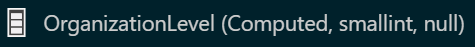
- we can have user defined data types as well
    - like a phone number in the adventure works DB
- we can create custom data types called CLR data types with multiple properties and methods using a .NET language such as C#

### Indexes

- everytime we create a key or a unique column we place an index on the column
- indexes are stored separately from the data but accessed automatically when we run a query
- and are updated everytime a row is added or removed from the table
- index is a data structure to help DB look up information fast, usually a balanced tree on data that can be ordered and searched using the equality operators \<,\>,\<=,\>=,==, and between
- its created automatically but we can create it with create index command
- instead of Btrees there are other generalized types of indexes as well

kinds of indexes

1. clustered
2. stores and organizes the table
3. arrange the data in the table like sort to make look up faster
4. a table can have only one clustered index thats because its just the entire table sorted on the cluster key
5. when we add new rows old rows dont have to move for them to stay in order because the new row will be added into the correct data page which will have some free space
6. a list of pointers is maintained to keep track of the order of the pages, so the rows in the other pages wont have to move
7. usually the primary key is used as the cluster key
8. non-clustered
9. defined on one or more columns of the table, its a separate strcuture that points to the actual table
10. stores the data and records in different tablesso that scanning records is faster to look for the data you want
11. we can have 999 unclustered index per table
12. these may be actually used if working with sparse columns

indexes are optional but greatly improve performance when properly designed and implemented

but they can also take up disk space

If a table has four nonclustered indexes, every write to that table may require four additional writes to keep the indexes up to date

### Example

- phone directory, primary key is the phone number but the cluster key is the first name plus the last name
- if the name starts with d you start looking in the beginning of the directory in your brain you did this calculation
    - mid alphabet is j or k and d\<j or k so it must be in the first half, thats basically a binary search

### schemas

- a collection to organize database objects and tables within the database
- a User has a default schema and when accessing an object in the default schema you dont have to specify the schema name but tis good practice to do so
- if a user has permission to create new objects the objects belong to the user's default schema unless specified other wise

### SELECT queries

- In a select statement from is the first clause the database engine evaluates
- The word GO doesn’t really do anything except divide the code up into separate distinct code batches.

In [ ]:
USE AdventureWorks2022;
--changing to the example database
GO
SELECT BusinessEntityID, JobTitle
FROM HumanResources.Employee;

- Column and table names need to follow specific naming rules so that SQL Server’s parser can recognize them. When a table, column, or database has a name that doesn’t follow those rules, you can still use that name, but you must enclose it within square brackets (\[\]).
- SQL Server allows you to create or rename a column within a query by using what is known as an alias. You use the keyword AS to specify an alias for the column.
- You can specify an alias name immediately following a column name. If an alias contains a space or is a reserved word—basically, keywords used to write T-SQL statements—you can surround the alias with square brackets, single quotes, or double quotes.

In [ ]:
SELECT 'A Literal Value' AS "Literal Value",
BusinessEntityID AS EmployeeID,
LoginID,
JobTitle
FROM HumanResources.Employee;

In [ ]:
SELECT EMP.JobTitle
FROM HumanResources.Employee AS EMP;

There is a property called collation that determines whether or not case matters. If the database is set to use a case-sensitive collation, then the names of the tables and columns must match exactly.  
  

single quotes are used for literal values

double quotes for column names, aliases and table names and aliases. double quotes or square brackets are necessary when name contains a space or is a keyword

1. <span style="color: var(--vscode-foreground);">Switch to the AdventureWorks database&nbsp;</span> <span style="color: var(--vscode-foreground);">Write a SELECT statement that lists the customers. Include the CustomerID, StoreID, and AccountNumber columns from the Sales.Customer table.</span>

In [ ]:
SELECT cus.CustomerID, cus.StoreID, cus.AccountNumber
FROM Sales.Customer AS cus;

2\. Write a SELECT statement that lists the name, product number, and color of each product from the Production.Product table.

In [ ]:
SELECT prod.Name, prod.Color
FROM Production.Product as prod;

3\. Write a SELECT statement that lists the customer ID numbers and sales order ID numbers from the Sales.SalesOrderHeader table.

In [ ]:
SELECT sales.CustomerID,sales.SalesOrderID
FROM Sales.SalesOrderHeader AS sales;

4\. Switch to the WideWorldImporters database for the remaining questions in this exercise. Write a SELECT statement that lists only the StateProvinceCode and the StateProvinceName from the Application.StateProvinces table. Include a literal value as the first column in the SELECT list: 'State Abbr/Name:'.

In [ ]:
SELECT 'omaewa mo shindeiru' AS "nani", StateProvinceCode, StateProvinceName
from Application.StateProvinces;

### Filtering data with the WHERE clause

1. the database engine evaluates the WHERE clause second after the FROM statement
2. <span style="font-size: 14px; color: var(--vscode-foreground);">the where clause expects predicates that can be calculated to true/false or unknown</span>

<span style="font-size: 14px;"><mark data-markjs="true" class="rangeHighlight">Syntax</mark></span>

> SELECT \<c1\>,\<c2\> 
> 
> <span style="color: var(--vscode-foreground);">FROM &lt;schema&gt;.&lt;table&gt;&nbsp;</span> 
> 
> <span style="color: var(--vscode-foreground);">WHERE &lt;column&gt;=&lt;val&gt;;</span>

Examples

In [ ]:
SELECT CustomerID, SalesOrderID
FROM Sales.SalesOrderHeader
WHERE CustomerID=11000;

SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE OrderDate = '2011-07-02';

SELECT BusinessEntityID, LoginID, JobTitle
FROM HumanResources.Employee
WHERE JobTitle = 'Chief Executive Officer';

-- single line comment

/*
multi line
comment
*/

### other operators to use with WHERE

1. \\\>
2. \<
3. \=
4. \<=
5. \\\>=
6. \<\>
7. !=
8. !\<
9. !\>
10. BETWEEN

In [ ]:
SELECT top 10 BusinessEntityID, FirstName
FROM Person.Person
WHERE FirstName > 'M';

if we do firstname \> 'M'  
you may think that only rows with the first name beginning with the letter N or later in the alphabet should be returned. However, if any FirstName value begins with M followed by at least one additional character, the value is greater than M, so the row will be returned.

!\> 'M' will mean \<= 'M'

BETWEEN operator with the WHERE clause  
usually used with dates, and the the edges of our logical clause are included in the result

when using the between operator the frist value must be smaller

<mark><mark><mark>Syntax</mark></mark></mark>

> SELECT c1, c2  
> <span style="color: var(--vscode-foreground);">FROM schema.table<br></span><span style="color: var(--vscode-foreground);">WHERE c3 BETWEEN val1 AND val2</span>

In [ ]:
SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE OrderDate BETWEEN '2011-07-02' AND '2011-07-04';

SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE CustomerID BETWEEN 25000 AND 25005;

SELECT BusinessEntityID, JobTitle
FROM HumanResources.Employee
WHERE JobTitle BETWEEN 'C' and 'E';

in the result of the query 3 you wont see any results starting with letter E because there are no jobs listings with only the letter E and since "EA" is actually \> "E" it wont be included in " BETWEEN 'C' AND 'E' "

we can also use the NOT operator with BETWEEN to find values outside the particular range and the values being used will not be part of the result as we can see by running the below query

In [ ]:
SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE CustomerID BETWEEN 11001 AND 11005;

SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE CustomerID NOT BETWEEN 11001 AND 11005 ORDER BY CustomerID ASC ;

In [ ]:
SELECT BusinessEntityID, JobTitle
FROM HumanResources.Employee
WHERE JobTitle NOT BETWEEN 'C' and 'E';

the query above will show job titles like executive because executive \> e

Another thing to notice is all these queries will return 00:00:00 in the time part of the date and time fields by default to get the time values we have to take it into account and modify our query for it.  
this happens because we were attempting to filter on such a column specifying only the date

In [24]:
DROP TABLE IF EXISTS DateTimeExample;
CREATE TABLE DateTimeExample(
    ID INT NOT NULL IDENTITY PRIMARY KEY,
    MyDate DATETIME2(0) NOT NULL,
    MyValue VARCHAR(25) NOT NULL
);

GO
INSERT INTO DateTimeExample(MyDate,MyValue)
VALUES ('2020-01-02 10:30','Bike'),
 ('2020-01-03 13:00','Trike'),
 ('2020-01-03 13:10','Bell'),
 ('2020-01-03 17:35','Seat');

Commands completed successfully.

(4 rows affected)

Total execution time: 00:00:00.011

In [ ]:
SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate = '2020-01-03';

SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate BETWEEN '2020-01-03 00:00:00' AND '2020-01-03 23:59:59';

By running the above queries you will see that the first query returns nothing meaning it was not able to match the date only to the value in the database  
<span style="color: var(--vscode-foreground);">and by the result of the second query you can see we needed to give the time as well because that was also in the database with the date&nbsp;<br></span> the above second query should be written with 2 conditionals actually if we want to use only the date part one filtering for dates greater than or equal to 2020-01-03 and another filtering for dates less than 2020- 01-04.<span style="color: var(--vscode-foreground);"><br></span>

<span style="color: var(--vscode-foreground);">if the date time field is like&nbsp;</span>  yyyy-mm-dd <span style="color: var(--vscode-foreground);">00:00:00 then we will be able to match the field with yyyy-mm-dd only&nbsp;</span>

In [ ]:
INSERT INTO DateTimeExample(MyDate,MyValue)
VALUES ('2020-01-02 00:00:00','Bike')

SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate = '2020-01-02';

SQL Server does not store the date using any particular character-based format but rather as an integer representing the number of days between 1900-01-01 and the date specified. If the data type holds the time, the time is stored as the number of clock ticks past midnight. As long as you pass a date in an appropriate format based on the localization settings of the server where SQL Server is installed, the value will be recognized as a date, but as a best practice always use the 'YYYY-MM-DD' format.

### Exercise 3-2

Use the adventure works database for questions 1 through 2 and the wide world importers database for questions 3 through 4

1\. Write a query using a WHERE clause that displays all the employees listed in the HumanResources.Employee table who have the job title “Research and Development Engineer.” Display the BusinessEntityID, the login ID, and the job title for each one. And a query to show where not equal to Research and Development Engineer

In [ ]:
SELECT emp.BusinessEntityID, emp.LoginID, emp.JobTitle
FROM HumanResources.Employee AS emp
WHERE emp.JobTitle = 'Research and Development Engineer';

SELECT emp.BusinessEntityID, emp.LoginID, emp.JobTitle
FROM HumanResources.Employee AS emp
WHERE emp.JobTitle <> 'Research and Development Engineer';

2\. Write a query displaying all the columns of the Production. ProductCostHistory table from the rows in which the standard cost is between the values of $10 and $13.

In [ ]:
SELECT *
FROM Production.ProductCostHistory AS prod
WHERE prod.StandardCost BETWEEN 10 AND 13

3\. Write a SELECT statement to return the CityName and LatestRecordedPopulation of the Application.Cities table. Limit (filter) the results to CityName equal to Simi Valley.

In [ ]:
SELECT ct.CityName, ct.LatestRecordedPopulation
FROM Application.Cities AS ct
WHERE ct.CityName='Simi Valley';

4\. Write a SELECT statement to return all the customers from the Sales. Customers table who signed up in 2016. Include the CustomerID, CustomerName, and AccountOpenedDate. Hint: Filter on the AccountOpenedDate (date only) and use the BETWEEN operator.

In [ ]:
SELECT hn.CustomerID, hn.CustomerName, hn.AccountOpenedDate
FROM Sales.Customers as hn 
WHERE hn.AccountOpenedDate BETWEEN '2016-01-01' AND '2016-12-31';

### Using WHERE Clauses with Two or more Predicates

use AND and OR operators to do so  
We typically do so when our conditions span multiple columns

In [ ]:
SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE FirstName = 'Ken' AND LastName = 'Myer';

-- or

SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE LastName = 'Myer' OR LastName = 'Meyer';

DROP TABLE IF EXISTS DateTimeExample;

In [ ]:
CREATE TABLE DateTimeExample(
 ID INT NOT NULL IDENTITY PRIMARY KEY,
 MyDate DATETIME2(0) NOT NULL,
 MyValue VARCHAR(25) NOT NULL
);
GO
INSERT DateTimeExample (MyDate, MyValue)
VALUES ('2020-01-01 10:30','Bike'),
 ('2020-01-01 11:30','Bike'),
 ('2020-01-02 13:00','Trike'),
 ('2020-01-03 13:10','Bell'),
 ('2020-01-03 17:35','Seat'),
 ('2020-01-04 00:00','Bike');
--4
SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate >= '2020-01-03' AND MyDate < '2020-01-04'; 

-- the above query is the best way to filter on dates

SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate BETWEEN '2020-01-03 00:00:00' AND '2020-01-03 23:59:59';

-- equivalent queries

### Using the IN Operator

use when you have multiple values to compare

<mark><mark><mark>Syntax</mark></mark></mark>

> SELECT c1,c2
> 
> FROM schema.table
> 
> WHERE col IN (val1,val2)

In [ ]:
SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE LastName = 'Myer' OR LastName = 'Meyer';

-- we can write this query like this

SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE LastName IN('Myer', 'Meyer');

SELECT TerritoryID, Name
FROM Sales.SalesTerritory
WHERE TerritoryID IN (2,2,1,4,5);


in the third query above as you can see 2 is given in the list of values twice this doesnt result in those rows being returned twice  
  
we can also use NOT operator with the IN operator to only return rows with values not specified in the list

### Exercise 3.3

1\. Write a query displaying the sales order ID, order date, and total due from the Sales.SalesOrderHeader table. Retrieve only those rows where the order was placed during the month of September 2012. use adventure works DB

In [ ]:
SELECT sh.SalesOrderID, sh.OrderDate, sh.TotalDue
FROM Sales.SalesOrderHeader AS sh
WHERE sh.OrderDate >='01-09-2012' AND sh.OrderDate < '01-10-2012'; 

2\. Write a query with the same columns as Question 1. Include rows where the Total Due is $10,000 or more or the SalesOrderID is less than 43000.

In [ ]:
SELECT sh.SalesOrderID, sh.OrderDate, sh.TotalDue
FROM Sales.SalesOrderHeader AS sh
WHERE sh.TotalDue >=10000 OR sh.SalesOrderID < 43000; 

3\. Write a SELECT statement against the WideWorldImporters database; issue a query to the \[Application\].\[StateProvinces\] table including both 1 and 45 for StateProvinceID. Use the IN operator. OK to use \* (star).

In [ ]:
SELECT *
FROM Application.StateProvinces AS sp
WHERE sp.StateProvinceID IN (1,45);

SELECT *
FROM Application.StateProvinces AS sp
WHERE sp.StateProvinceID =1 OR sp.StateProvinceID = 45;

### working with nulls

- to filter for null we can write 
    - WHERE tbl.clm IS NULL
    - we have to use IS because null is not a value and therefor can not be equal to anything
- where comparing columns together or to a static values it resolves to true or flase and based on that values are returned, but if the column contains null it resolves to UKNOWN instead, and the values are not returned for that either.
- its not so simple when using other operators beside "=". the opposite of false is true but the opposite of UNKNOWN is still UNKNOWN
- be weary of always accounting for nulls especially when filtering using the NOT operator
- when using "\<" operator rows with NULL will be left out

1\. Write a query displaying the ProductID, Name, and Color columns from rows in the Production.Product table. Display only those rows where no color has been assigned.

In [ ]:
SELECT Color
FROM Production.Product
WHERE Color IS NULL

2\. Write a query displaying the ProductID, Name, and Color columns from rows in the Production.Product table. Display only those rows in which the color is known not to be blue.

In [ ]:
SELECT Color
FROM Production.Product
WHERE Color != 'Blue' AND Color IS NOT NULL;

3\. Write a query displaying ProductID, Name, Style, Size, and Color from the Production.Product table. Include only the rows where at least one of the Size or Color columns contains a value.

In [ ]:
SELECT Color, Size
FROM Production.Product
WHERE Size IS NOT NULL OR Color IS NOT NULL;

### Sorting using ORDER BY

<mark><mark><mark>Syntax</mark></mark></mark>

> SELECT col1, col2
> 
> FROM schema.table
> 
> WHERE col3=val
> 
> ORDER BY col4 ASC/DESC, col5 ASC/DESC

When NULLs are part of the results, they will show up first when sorting in an ascending.

In [ ]:
SELECT BusinessEntityID, LastName, FirstName, MiddleName
FROM Person.Person
ORDER BY LastName DESC, FirstName DESC, MiddleName DESC;

SELECT BusinessEntityID, FirstName, MiddleName
FROM Person.Person
ORDER BY LastName DESC;

the column you are sorting on doesnt need to be part of the data that you are selecting

### Performance using indexes

- sql server if possible will return the required columns from the index instead of accessing the table
- its pertinent to design the database intelligently and creating optimal indexes for queries
- if we have an index on a column and the column is in the where clause of the query the DB engine will use the index
- what happens when we query on a non indexed column the DB must check the value in each row of that column

if we want to see if the DB engine uses any index for a query we can use execution plans by clicking explain in ADS

### Built in functions and expressions

- used to create expressions in TSQL we use functions and operators along with literal values and columns
- we may want to create an expression for as simple a task as to only display the year part of the datetime column
- or to do some calculations on columns like calculating discount based on the order amount and order cost
- when ever we want to display filter or order data in a custom way we can use functions and expressions
- we can use the expressions we create in the SELECT clauses

### concatinating string

- use the + operators with strings int single quotes
- we can concatenate literals or column values and give the concatenated column aliases
- its pertinent to always alias expressions when selecting them

In [ ]:
SELECT BusinessEntityID, FirstName +' '+LastName AS FullName
FROM Person.Person;

SELECT 'ab'+'cd';

### Concatinating Strings with NULL values  

- if we concatenate a column with another column that has null values then we get null as the result in that row, execute the below query to see that in action

In [ ]:
SELECT BusinessEntityID, FirstName +' '+MiddleName AS FullName
FROM Person.Person;

- we can concat the strings columns and literals using the CONCAT built in function
- the CONCAT function can take any number of values and the output is implicitly converted to string
- we can also use variables with the concact function
- CONCAT can handle the nulls in the columns we are trying to concat and appends and empty string instead ""

In [ ]:
SELECT CONCAT('I','love','t-sql');

DECLARE @a VARCHAR(30) ='My birthday is on ';
DECLARE @b DATE = '1980/08/25';
SELECT CONCAT(@a,@b) AS result;

SELECT CONCAT(FirstName,MiddleName) as fullname
FROM Person.Person;

### Functions to handle NULL

- ISNULL
    - expects two parameters the value to check and the replacement for NULL
- COALESCE
    - takes in any number of inputs and returns the first non-null value
- its preferable to use COALESCE

In [ ]:
SELECT FirstName +' '+ ISNULL(MiddleName,'')+' '+LastName AS FullName
FROM person.Person;

this query is a step in the right direction but you can see when there is middle name missing we end up with two spaces between firstname and the last name, we can handle that with the following query

remember anything + NULL is NULL in T-SQL

In [ ]:
SELECT FirstName +ISNULL(' '+MiddleName,'')+' '+LastName AS FullName
FROM Person.Person;

-- or with coalesce

SELECT FirstName +coalesce(' '+MiddleName,'')+' '+LastName AS FullName
FROM Person.Person;

- if we concat a 1 and '1' we get 2 not 11 because if the string can be converted implicity to number it will be 
    
- to get 11 we must explicitly convert the number 1 to a string 
    
    - this can be done using the CAST or CONVERT method
    - CAST syntax
        - CAST (\<Value\> AS \<new data type\>)
    - CONVERT syntax
        - CONVERT(\<new data type\>,\<vaule\>)
- if we try to concat a non numeric string and a number SQL server will throw an error because integers have higher precedence

In [ ]:
SELECT 1+'1';
SELECT 1+'a';

- insteda of using the CAST or CONVERT function to convert string to numbe ruse the concat function instead because all these cases are handled in that function

In [ ]:
SELECT CONCAT(1,'1');
SELECT CONCAT(1,'A');

In [ ]:
-- QUERIES TO SHOW THE USE OF CAST AND CONVERT

SELECT CONCAT(CAST(BusinessEntityID AS NVARCHAR),':',LastName,FirstName) AS NAMEID
FROM Person.Person;

SELECT CONCAT(CONVERT(NVARCHAR,BusinessEntityID),':',LastName,FirstName) AS NAMEID
FROM Person.Person;

In [ ]:
SELECT BusinessEntityID, BusinessEntityID+'1' AS "Adds 1", CAST(BusinessEntityID AS NVARCHAR) + '1' AS "Appends 1"
FROM    Person.Person

It is preferable to use CAST over CONVERT  
<span style="color: var(--vscode-foreground);">whenever we specify NVARCHAR without specifying the lenght the default maximum length is used which is 30 characters,<br>if we want a length greater than 30 we must specify it<br>its beset practice to always specify the length because it defaults to 1 when declaring a variable</span>

### Exercise 4.1  
Use the AdventureWorks2019 database to complete Questions 1–4. Complete the rest of the questions using the WideWorldImporters database.

1\. Write a query that returns data from the Person.Address table in this format AddressLine1 (City PostalCode) from the Person.Address table.

In [ ]:
SELECT CONCAT(City,' ',PostalCode) AS ADDRESSLINE1
FROM Person.Address

2\. Write a query using the Production.Product table displaying the product ID, color, and name columns. If the color column contains a NULL, replace the color with No Color.

In [ ]:
SELECT PROD.ProductID, COALESCE(PROD.Color,'NO COLOR'), PROD.Name
FROM Production.Product AS PROD;

3\. Modify the query written in Question 2 so that the description of the product is returned formatted as Name: Color. Make sure that all rows display a value even if the Color value is missing.

In [ ]:
SELECT PROD.ProductID,CONCAT(PROD.Name,': ', COALESCE(PROD.Color,'NO COLOR')) AS DESCRIPTION
FROM Production.Product AS PROD;

4\. Write a query using the Production.Product table displaying a description with the ProductID: Name format. Hint: You will need to use a function to write this query.

In [ ]:
SELECT CONCAT(PROD.ProductID,':',' '+PROD.Name,':',' '+ COALESCE(PROD.Color,'NO COLOR')) AS DESCRIPTION
FROM Production.Product AS PROD;

5\. Switch to WideWorldImporters. Write a query against the Application.People table using only FullName and SearchName. Format the output like this: FullName (SearchName)

In [ ]:
SELECT CONCAT(FullName,'(',SearchName,')')
FROM Application.People;

6\. Write a query using the Application.Cities table, returning only CityName, LatestRecordedPopulation. Use COALESCE or ISNULL to return 0 for those cities not reporting a LatestRecordedPopulation.

In [ ]:
SELECT CityName,COALESCE(LatestRecordedPopulation,'N/A')
FROM Application.Cities;
--THIS THROWS AN ERROR

SELECT CityName,COALESCE(LatestRecordedPopulation,CAST('0' AS INT))
FROM Application.Cities;

Inbuilt functions

1. CONCAT
2. CAST
3. COALESCE

Variable declaration synax

> <span style="color: #c678dd;">DECLARE</span> @a <span style="color: #c678dd;">VARCHAR</span>(<span style="color: #d19a66;">30</span>) =<span style="color: #98c379;">'My birthday is on '</span>;
> 
> <span style="color: #c678dd;">DECLARE</span> @b <span style="color: #c678dd;">DATE</span> = <span style="color: #98c379;">'1980/08/25'</span>;

### mathematical operators

2. \-
3. \*
4. /
5. %

to get decimal division the values used in the expression need to be decimal other wise we get integer division, either the divident or the divison

In [ ]:
SELECT 1 + 1 AS ADDITION, 10.0 / 3 AS DIVISION, 10 / 3 AS [Integer Division], 10/3.0 AS [Decimal Division], 10 % 3 AS MODULO;

we can do complex calculations on columns here as well for things like calculation of discounts

In [ ]:
SELECT SpecialOfferID,MaxQty,DiscountPct, DiscountPct * COALESCE(MaxQty, 1000) AS MaxDiscount
FROM Sales.SpecialOffer;

QUESTION

Switch to the WideWorldImporters database. Write a query against the Sales. OrderLines table. Include the StockItemID. Calculate the extended price (Quantity times UnitPrice). Calculate the tax (extended price times 0.15). Calculate the extended amount (extended price plus tax).

In [ ]:
SELECT StockItemID, Quantity*UnitPrice AS [Extended price], 
(Quantity*UnitPrice) *0.15 AS Tax, 
(Quantity*UnitPrice)+(Quantity*UnitPrice)*0.15 as [Extended amount]
FROM Sales.OrderLines;

the above repeated code can be solved by common table expressions or CTE for short, which will be covered later on but this is how they look

In [ ]:
WITH ExtendedPriceCTE AS (
    SELECT
        StockItemID,
        Quantity * UnitPrice AS [Extended price],
        Quantity * UnitPrice * 0.15 AS Tax
    FROM
        Sales.OrderLines
)

SELECT
    StockItemID,
    [Extended price],
    Tax,
    [Extended price] + Tax AS [Extended amount]
FROM
    ExtendedPriceCTE;

When performing an operation that involves two different data types, the expression will return values for the data type with the highest precedence if possible.  
if a value can be a valid INT, it is also a valid BIGINT. However, many valid BIGINT values are too big to be converted to INT an operation on these two data types will return a BIGINT

SQL Server uses the following precedence order for data types:

1. user-defined data types (highest)
2. sql\_variant
3. xml
4. datetimeoffset
5. datetime2
6. datetime
7. smalldatetime
8. date
9. time
10. float
11. real
12. decimal
13. money
14. smallmoney
15. bigint
16. int
17. smallint
18. tinyint
19. bit
20. ntext
21. text
22. image
23. timestamp
24. uniqueidentifier
25. nvarchar (including nvarchar(max) )
26. nchar
27. varchar (including varchar(max) )
28. char
29. varbinary (including varbinary(max) )
30. binary (lowest)

### String functions

remember if the string manipulation is complex it maybe a good idea to do the string manipulation on the server side or the client side but not at the DB level, bu alot of manipulations are possible here using T-SQL

### RTRIM, LTRIM and TRIM functions

To trim from the right side, left side or both

Syntax  

> RTRIM(\<string\>)
> 
> LTRIM(<span style="color: var(--vscode-foreground);">&lt;string&gt;</span><span style="color: var(--vscode-foreground);">)<br></span>
> 
> <span style="color: var(--vscode-foreground);">TRIM(</span><span style="color: var(--vscode-foreground);">&lt;string&gt;</span><span style="color: var(--vscode-foreground);">)</span>

In [ ]:
CREATE TABLE TRIMEXAMPLE (COL1 VARCHAR(10));
GO
INSERT INTO TRIMEXAMPLE (COL1) VALUES ('A'),('B '),(' C'),(' D ');
SELECT COL1, '*'+RTRIM(COL1)+'*' AS [RTRIM],
'*'+LTRIM(COL1)+'*' AS[LTRIM],
'*'+TRIM(COL1)+'*' AS[TRIM]
FROM TRIMEXAMPLE;
GO
DROP TABLE TRIMEXAMPLE;

### LEFT and RIGHT functions

left takes two parameters a string and an int and gives a substring of length n(AS MANY AS POSSIBLE) from the left

> LEFT(\<STRING\>,\<INT\>)

right takes two parameters a string and an int and gives a REVERSE substring FROM THE END of length n<span style="color: var(--vscode-foreground);">(AS MANY AS POSSIBLE)</span>   <span style="color: var(--vscode-foreground);">&nbsp;from the right</span>

> RIGHT(\<STRING\>,\<INT\>)

In [ ]:
SELECT LastName, LEFT(LastName,5) AS [LEFT],RIGHT(LastName,5) AS [RIGHT]
FROM Person.Person
WHERE BusinessEntityID IN (293,295,211,297,299,3057,15027);

### LEN and DATALENGTH

LEN returns the number of characters in a string

> LEN(\<STRING\>)

DATALENGTH returns the number of bytes in any data type or expression

> DATALENGTH(\<ANY EXPRESSION\>)

both return the same thing if the string is a char or varchar which takes one byte per character

both return diff when string is NCHAR or NVARCHAR which takes upto two bytes per character, so DATALENGTH is 2\* LEN

In [ ]:
SELECT LastName,LEN(LastName) AS "Length",
 DATALENGTH(LastName) AS "Internal Data Length"
FROM Person.Person

### CHARINDEX

to get the index of a serach string inside another

- <span style="color: var(--vscode-foreground);">if the value returned is less than zero then it doesnt exist inside the string</span>
- <span style="color: var(--vscode-foreground);">returns the answer as 1 based indexing&nbsp;</span>  <span style="color: var(--vscode-foreground);">it includes the optional start index in the search, that is, if the search string starts at the start index it will return the start index&nbsp;</span>  
- <span style="color: var(--vscode-foreground);">its not case sensitive by default&nbsp;</span>  
- <span style="color: var(--vscode-foreground);">to make it case sensitive we have to use the COLLATE clause in the char index</span>

> <span style="background-color: rgba(127, 127, 127, 0.1);">CHARINDEX(&lt;SEARCH STRING&gt;, &lt;TARGET STRING&gt;,[&lt;OPTIONAL START INDEX&gt;])</span>
> 
> <span style="color: rgb(255, 255, 255); font-family: &quot;Söhne Mono&quot;, Monaco, &quot;Andale Mono&quot;, &quot;Ubuntu Mono&quot;, monospace; white-space: pre; background-color: rgb(6, 6, 6);">CHARINDEX(</span><span style="font-family: &quot;Söhne Mono&quot;, Monaco, &quot;Andale Mono&quot;, &quot;Ubuntu Mono&quot;, monospace; white-space: pre; background-color: rgb(6, 6, 6);"><font color="#ff64c4">&lt;search string&gt; </font></span> <span class="hljs-keyword" style="border: 0px solid rgb(88, 95, 98); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; --darkreader-bg--tw-ring-offset-width: 0px; --darkreader-bg--tw-ring-offset-color: #292b2d; --darkreader-bg--tw-ring-color: rgba(85, 108, 193, 0.5); --darkreader-bg--tw-ring-offset-shadow: 0 0 transparent; --darkreader-bg--tw-ring-shadow: 0 0 transparent; --darkreader-bg--tw-shadow: 0 0 transparent; color: rgb(102, 233, 255); font-family: &quot;Söhne Mono&quot;, Monaco, &quot;Andale Mono&quot;, &quot;Ubuntu Mono&quot;, monospace; white-space: pre; background-color: rgb(6, 6, 6);">COLLATE</span> <span style="color: rgb(255, 255, 255); font-family: &quot;Söhne Mono&quot;, Monaco, &quot;Andale Mono&quot;, &quot;Ubuntu Mono&quot;, monospace; white-space: pre; background-color: rgb(6, 6, 6);">Latin1_General_CS_AS, </span> <span style="font-family: &quot;Söhne Mono&quot;, Monaco, &quot;Andale Mono&quot;, &quot;Ubuntu Mono&quot;, monospace; white-space: pre; background-color: rgb(6, 6, 6);"><font color="#ff64c4">&lt;target string&gt;</font></span><span style="color: rgb(255, 255, 255); font-family: &quot;Söhne Mono&quot;, Monaco, &quot;Andale Mono&quot;, &quot;Ubuntu Mono&quot;, monospace; white-space: pre; background-color: rgb(6, 6, 6);">)</span><span style="background-color: rgba(127, 127, 127, 0.1);"><br></span>

In [ ]:
SELECT lastname,
    CHARINDEX('nc',LastName) AS [SIMPLE SERACHING],
    CHARINDEX('nc',LastName,3) AS [SEARCHING FROM WHERE THE STRING STARTS],
    CHARINDEX('nc',LastName,4) AS [SEARCHING FROM BEYOND WHERE THE STRING STARTS],
    CHARINDEX('NC' COLLATE Latin1_General_CS_AS,LastName) [CASE SENSITIVE SIMPLE SEARCHING],
    CHARINDEX('NC' COLLATE Latin1_General_CS_AS,'ANCA',3) [CASE SENSITIVE SIMPLE SEARCHING FROM BEYOND]
FROM Person.Person WHERE Person.BusinessEntityID =1

### SUBSTRING

- The length parameter can be more than the length of the string it will give substring as from the starting point to the end
- inclusive of the start index
- the length parameter is compulsary
- if the starting point is beyong the length of the string returns empty

> SUBSTRING(\<STRING\>,\<START INDEX\>, \<LENGTH\>)

In [ ]:
SELECT SUBSTRING('ABC',1,3),SUBSTRING('ABC',0,1),SUBSTRING('ABC',0,4),SUBSTRING('ABC',1,4);

### CHOOSE

- expects an index and a list of values and selects the value at the index with 1 based indexing
- the results take the highest data type precedence. This means if there is an integer in the list, the CHOOSE function will try to convert any results to an integer. If the value is a string, the CHOOSE command will throw an error.
- we will need to convert all values to VARCHAR to avoid this issue
- If the position doesn’t exist, a NULL value will be returned.

> CHOOSE(index, val1, val2, val3\[, val4\]);

In [ ]:
SELECT CHOOSE (4,'A','B','C','D','E','F');

REVERSE

- reverses a string

> REVERSE('STRING');

- a use case is to get the file name from a file path 
    - reverse the string
    - get the index of the first backslash with charindex
    - and get the file name from the original string with right function using the index we just got

In [ ]:
SELECT RIGHT('HI/BYE/BYE.YML',CHARINDEX('/',REVERSE('HI/BYE/BYE.YML'))-1) as filenamefromright,
    SUBSTRING('HI/BYE/BYE.YML',CHARINDEX('/',REVERSE('HI/BYE/BYE.YML')),50) as filenamefromsubstring;

UPPER and LOWER

> UPPER('STRING')
> 
> LOWER('STRING')
> 
> LOWER(\<COLUMN NAME\>)

REPLACE

- To replace one string value inside another
- replaces every occurance of the string to be replaced
- has three parameters
    - the original string
    - the part of the string to replace, nothing happens if the part of the string doesnt actually exist in the string
    - and the replacement

> REPLACE(\<STRING VALUE\>,\<STRING TO REPLACE\>,\<REPLACEMENT\>)

In [ ]:
SELECT LastName,REPLACE(LastName,'X','Z') AS REPLACEaWITHz,
    REPLACE(LastName,'AB','') AS [REMOVE]
FROM Person.Person
WHERE BusinessEntityID IN (293,295,211,297,299,3057,15207);

STRING\_SPLIT and STRING\_AGG

- string\_split instead of returning a value returns a table
    - takes a string splits it into values in multiple rows
- string\_agg does the opposite
    - operates over a set of rows and concatenates the values into a delimited string

> STRING\_SPLIT('STRING TO OPERATE ON','DELIMITER')
> 
>   
> 
> STRING\_AGG('COLUMN NAME TO OPERATE ON','DELIMITER')

In [ ]:
SELECT VALUE 
FROM STRING_SPLIT('1,2,3,4,5,6,7,8,9',',');

SELECT STRING_AGG(Name,', ') AS LIST
FROM Production.ProductCategory;

### List of the string functions

1. STRING\_SPLIT(\<STRING TO OPERATE ON\>,\<DELIMITER\>)
2. STRING\_AGG(\<COLUMN TO OPERATE ON\>,\<DELIMITER\>)
3. REPLACE(\<STRING\>,\<PART TO REPLACE\>,\<REPLACEMENT\>)
4. SUBSTRING(\<STRING\>,\<INDEX\>,\<LENGTH\>)
5. CHARINDEX(\<SEARCH STRING\>, \<TARGET STRING\> \[,\<OPTIONAL START INDEX\>\])
6. CHARINDEX(\<SEARCH INDEX\> COLLATE Latin1\_General\_CS\_AS, \<TARGET STRING\>)
7. REVERSE(\<STRING\>)
8. LEFT(\<STRING\>, \<INT\>)
9. RIGHT(\<STRING\>,\<INT\>)
10. LTRIM(\<STRING\>)
11. RTRIM(\<STRING\>)
12. TRIM(\<STRING\>)
13. UPPER(\<STRING\>)
14. LOWER(\<STRING\>)
15. CHOOSE(\<INDEX\>, \<val1\>, \<val2\>, \<val3\>\[, \<val4\>\]);
16. LEN(\<LEN\>)
17. DATALENGTH(\<ANY EXPRESSION\>)

### Exercise 4.3

Use the AdventureWorks database to complete Questions 1 to 4. Then switch to the WideWorldImporters to complete this exercise.

1\. Write a query that displays the first ten characters of the AddressLine1 column in the Person.Address table.

In [ ]:
SELECT LEFT(AddressLine1,10)
FROM Person.Address;

2\. Write a query that displays characters 10 to 15 of the AddressLine1 column in the Person.Address table.

In [ ]:
SELECT LEFT(AddressLine1,10), SUBSTRING(AddressLine1,11,5)
FROM Person.Address;

3\. Write a query displaying the first and last names from the Person.Person table all in uppercase.

In [ ]:
SELECT UPPER(FirstName),UPPER(LastName)
FROM Person.Person

4\. The ProductNumber in the Production.Product table contains a hyphen (-). Write a query that uses the SUBSTRING function and the CHARINDEX function to display the characters in the product number following the hyphen. Note: There is also a second hyphen in many of the rows; ignore the second hyphen for this question. Hint: Try writing this statement in two steps, the first using the CHARINDEX function and the second adding the SUBSTRING function.

In [ ]:
SELECT ProductNumber,SUBSTRING(ProductNumber,CHARINDEX('-',ProductNumber)+1,LEN(ProductNumber))
FROM Production.Product

5\. Switch to the WideWorldImporters database. Write a SELECT statement to the Application.Countries table, creating a new code, which is the first three characters of the CountryName capitalized. Alias the column NewCode, returning only the column created and the IsoAlpha3Code column. Hint: You will use both the UPPER() function and the LEFT() function.

In [ ]:
SELECT SUBSTRING(UPPER(CountryName),1,3) AS NEWCODE
FROM Application.Countries;

6\. In the CustomerName (located in the Sales.Customer table), return only the portion inside of parentheses, including the parentheses. Hint: See the “Nesting Functions” section. You may need to use a number of built-in functions, such as SUBSTRING(), CHARINDEX(), and LEN().

In [ ]:
SELECT CustomerName, SUBSTRING(CustomerName, CHARINDEX('(',CustomerName)+1,LEN(CustomerName)-CHARINDEX('(',CustomerName)-1)
FROM Sales.Customers

### DATE and TIME functions

- GETDATE()
- SYSDATETIME()
- DATEADD(\<DATE PART\>,\<NUMBER\>,\<DATE\>)
- DATEDIFF(\<DATE PART\>,\<EARLY DATE\>,\<LATER DATE\>)
- DATENAME(\<DATEPART\>,\<DATE\>)
- DATEPART(\<DATEPART\>,\<DATE\>)
- DAY(\<DATE\>)
- MONTH(\<DATE\>)
- YEAR(\<DATE\>)
- CONVERT(\<DATA TYPE, USUALLY VARCHAR\>, \<DATE\>, \<STYLE\>)
- FORMAT(VALUE , FORMAT \[, CULTURE\])

### GETDATE() and SYSDATETIME()

- Non deterministic, returns a different value each time

In [ ]:
SELECT GETDATE(), SYSDATETIME();

### DATEADD

- To add number of time units to a date
    - date part
    - number
    - date
- T-sql doesnt have DATESUBTRACT so use DATEADD with -ve number
- Possible date part values are
    - yy,yyyy =\> Year
    - qq,q =\> Quarter
    - mm,m =\> Month 
    - dy,y =\> DayOfYear
    - dd,d =\> Day
    - wk,ww =\> Week
    - Dw =\> Weekday
    - ss,s =\> Second
    - Ms =\> Millisecond
    - Mcs =\> Microsecond
    - Ns =\> nanosecond

> DATEADD(\<DATE PART\>,\<NUMBER\>,\<DATE\>)

In [ ]:
SELECT OrderDate, DATEADD(YEAR,1,OrderDate) AS ADDYEAR,
DATEADD(MONTH,1,OrderDate) AS ADDMONTH,
DATEADD(YEAR,1.5,OrderDate) AS FRACTIONALADDITION,
DATEADD(DAY,-1,OrderDate) AS DAYSUBTRACTION
FROM Sales.SalesOrderHeader
WHERE SalesOrderID IN (43659,43714,60621)

Adding a fraction doesnt work,only adds the whole number part of the fraction

In [ ]:
SELECT DATEADD(MONTH,1,'2009-01-29'),DATEADD(MONTH,1,'2009-01-30'),DATEADD(DAY,1,'2009-02-28')

Adding 1 month to jan 29th,30th,31st will take us to the lasst day of february that year and not to march

### <span style="color: var(--vscode-foreground);">DATEDIFF(&lt;DATE PART&gt;,&lt;EARLY DATE&gt;,&lt;LATER DATE&gt;)</span>

- Find difference between two dates

In [ ]:
SELECT OrderDate, GETDATE() AS CurrentDateTime,
 DATEDIFF(year,OrderDate,GETDATE()) AS YearDiff,
 DATEDIFF(month,OrderDate,GETDATE()) AS MonthDiff,
 DATEDIFF(d,OrderDate,GETDATE()) AS DayDiff
FROM Sales.SalesOrderHeader
WHERE SalesOrderID in (43659,43714,60621);

In [ ]:
SELECT DATEDIFF(year,'2008-12-31','2009-01-01') AS YearDiff,
 DATEDIFF(month,'2008-12-31','2009-01-01') AS MonthDiff,
 DATEDIFF(d,'2008-12-31','2009-01-01') AS DayDiff;

There is a 1 year 1 month and 1 day difference between 31st december and 1st january of the next year because the DATEDIFF finctions rounds up

### DATENAME(\<DATEPART\>,\<DATE\>) and DATEPART(\<DATEPART\>,\<DATE\>)

- return the part of the date specified
- to get just the year or month from a date
- DATEPART returns an int always
- DATENAME return a string of characters incase of month or day of the week

> DATENAME(\<DATEPART\>,\<DATE\>)
> 
> DATEPART(\<DATEPART\>,\<DATE\>)

In [ ]:
SELECT OrderDate,DATEPART(YEAR,OrderDate) AS [YEAR], DATEPART(MONTH,OrderDate) AS [MONTH], DATEPART(DAY,OrderDate) AS [DAY],DATEPART(WEEKDAY,OrderDate) AS [WEEKDAY]
FROM Sales.SalesOrderHeader;

In [ ]:
SELECT OrderDate,DATENAME(YEAR,OrderDate) AS [YEAR],DATENAME(MONTH,OrderDate) AS [MONTH],DATENAME(DAY,OrderDate) AS [DAY],DATENAME(WEEKDAY,OrderDate) AS [WEEKDAY]
FROM Sales.SalesOrderHeader;

Another way to get the DAY MONTH OR THE YEAR  is to use the functions

- DAY(\<DATE\>)
- MONTH(\<DATE\>)
- YEAR(\<DATE\>)

They return numbers

### CONVERT(\<DATA TYPE, USUALLY VARCHAR\>, \<DATE\>, \<STYLE\>)

- To append a date to a string the date must first be converted to a string
- style is an optional parameter can be used to format the date or a number
- LOOK FOR THE STYLE YOU WANT ONLINE
- This mehtod is often used to remove the date part from datetime data type, by casting to a DATE only a date is returned
- all the three digit styles produce 4 digit years

In [ ]:
SELECT CONVERT(VARCHAR, GETDATE(),111) AS [DATE];

SELECT CONVERT(VARCHAR,GETDATE(),1) AS [1],
CONVERT(VARCHAR,GETDATE(),101) AS [101],
CONVERT(VARCHAR,GETDATE(),2) AS [2],
CONVERT(VARCHAR,GETDATE(),102) AS [102];

### FORMAT(VALUE , FORMAT \[, CULTURE\])

- to do datetime to string converisons
- can be used to do datetime to equivalent culture specific dates
- look for different formats online

In [ ]:
DECLARE @d DATETIME = GETDATE();

SELECT FORMAT(@d, 'dd', 'en-US') AS RESULT;
SELECT FORMAT (@d,'yyyy-M-d') AS RESULT;
SELECT FORMAT(@d,'MM/dd/yyyy','en-US') AS RESULT;

### DATEFROMPARTS to make integers into date

In [ ]:
SELECT DATETIME2FROMPARTS(2023,12,22,12,10,32,0,0);

### EOMONTH( \<DATE\> \[, \<offset\>)

- Returns the date of the last day of the supplied month
- offset from the current month

In [ ]:
SELECT EOMONTH(GETDATE()) AS [END OF THIS MONTH], EOMONTH(GETDATE(),1) AS [END OF NEXT MONTH]

### EXERCISE 4.4 USING ADVENTUREWORKS

1\. Write a query that calculates the number of days between the date an order was placed and the date that it was shipped using the Sales. SalesOrderHeader table. Include the SalesOrderID, OrderDate, and ShipDate columns.

2\. Write a query that displays only the date, not the time, for the order date and ship date in the Sales.SalesOrderHeader table

In [ ]:
SELECT SalesOrderID,CONVERT(DATE,OrderDate,1),CONVERT(DATE,ShipDate,1),DATEDIFF(DAY,OrderDate,ShipDate)
FROM SALES.SalesOrderHeader;

3\. Write a query that adds six months to each order date in the Sales. SalesOrderHeader table.

In [ ]:
SELECT SalesOrderID,DATEADD(MONTH,6,OrderDate),OrderDate
FROM SALES.SalesOrderHeader;

4\. Write a query that displays the year of each order date and the numeric month of each order date in separate columns in the results. Include the SalesOrderID and OrderDate columns

5\. Change the query written in Question 4 to display the month name instead.

In [ ]:
SELECT SalesOrderID,YEAR(OrderDate),MONTH(OrderDate),OrderDate,DATENAME(MONTH,OrderDate)
FROM SALES.SalesOrderHeader;

6\. Write a SELECT statement that returns the date five quarters in the past from today’s date.

In [ ]:
SELECT GETDATE(),DATEADD(QUARTER,-5,GETDATE());

### MATHEMATICAL FUNCTIONS

- ABS(\<NUMBER\>)
- POWER(\<NUMBER\>,\<POWER\>)
- SQUARE(\<NUMBER\>)
- SQRT(\<NUMBER\>)
- ROUND(\<NUMBER\>, \<LENGTH\>\[,\<FUNCTION\>
- RAND()

POWER(\<NUMBER\>,\<POWER\>)

- when the first argument is 10 the functions tries to return an int bu the value of 10^10 is too large therefore convert the first argument to float first

In [ ]:
SELECT POWER(CONVERT(float,10),10)

ROUND(NUMBER LENGTH \[,FUNCTION\])

- the third parameter is just a flag to make the round function just truncate

In [ ]:
SELECT ROUND(1234.1294,2) AS "2 places on the right",
 ROUND(1234.1294,-2) AS "2 places on the left",
 ROUND(1234.1294,2,1) AS "Truncate 2",
 ROUND(1234.1294,-2,1) AS "Truncate -2";

### RAND(seed)

- Returns a random value between 0 and 1
- it optinally takes a seed value, with the seed value it returns the same value everytime

In [ ]:
SELECT CAST(RAND()*100 AS INT)+1 AS "1 TO 100"

- If you supply a seed value to one of the calls to RAND within a batch of statements, that seed affects the other calls. The value is not the same, but the values are predictable
- If you leave out the seed, you will see different results each time.

In [ ]:
SELECT RAND(3),RAND(),RAND();

In [ ]:
SELECT RAND(),RAND(),RAND(),RAND()
FROM sys.objects;

- even though you see different values in each column, you will see the same values in each row.

### EXERCISE 4.5

Use the AdventureWorks2019 database to complete this exercise.

1\. Write a query using the Sales.SalesOrderHeader table that displays the SubTotal rounded to two decimal places. Include the SalesOrderID column in the results.  
2\. Modify the query from Question 1 so that the SubTotal is rounded to the nearest dollar but still displays two zeros to the right of the decimal place.

In [ ]:
SELECT ROUND(SubTotal,2),ROUND(SubTotal,0)
FROM Sales.SalesOrderHeader;

3\. Write a query that calculates the square root of the SalesOrderID value from the Sales.SalesOrderHeader table.

In [ ]:
SELECT SQRT(SalesOrderID)
FROM Sales.SalesOrderHeader

4\. Write a statement that generates a random number between 1 and 10 each time it is run.

In [ ]:
SELECT ROUND((RAND()*10),0), ROUND(0.3,0),ROUND(10.5,0);

### LOGICAL FUNCTIONS

### CASE

- to evaluate a list of expressions and return the first one that evaluates to true
- There are two ways to write a CASE expression: simple or searched.

### SIMPLE CASE

Basically switch case

syntax - 

<span style="background-color: rgba(127, 127, 127, 0.1); color: var(--vscode-foreground);">CASE &lt;TEST EXPRESSION&gt;<br>&nbsp; &nbsp; &nbsp; &nbsp; T</span><span style="color: var(--vscode-foreground); background-color: rgba(127, 127, 127, 0.1);">HEN &lt;POSSIBLE VALUE 1&gt; THEN &lt;RETURN VALUE 1&gt;<br></span>        <span style="background-color: rgba(127, 127, 127, 0.1); color: var(--vscode-foreground);">WHEN &lt;POSSIBLE VALUE 2&gt; THEN &lt;RETURN VALUE 2&gt;<br></span>        <span style="background-color: rgba(127, 127, 127, 0.1); color: var(--vscode-foreground);">[ELSE &lt;RETURN VALUE 3&gt;] END</span>

In [ ]:
SELECT  Title ,
    CASE Title 
    when 'Mr.' then 'Male'
    when 'Ms.' then 'female'
    when 'Mrs.' then 'female'
    when 'Miss' then 'female'
    else 'unknown' END as Gender
FROM Person.Person;

### SEARCHED CASE

use when the case expression is too complicated like comparing a column to see if the values are IN a list  
If none of the expressions returns true, the function returns the value from the ELSE part or NULL if no ELSE is available  
the return values must be of compatible data types  
precedence rules apply to the return values as other operations  
can’t have one part of the expression returning an integer while another part returns a nonnumeric string.  

syntax

CASE WHEN \<TEST EXPRESSION 1\> THEN \<VALUE 1\>  
\[WHEN \<TEST EXPRESSION 2\> THEN \<VALUE 2\>\]  
\[ELSE \<VALUE 3\>\] END

In [ ]:
SELECT Title,
CASE WHEN Title IN ('Ms.','Mrs.','Miss') then 'Female'
when Title = 'Mr.' then 'Male'
else 'unknown' end as Gender
from Person.Person;

Its possible to return columns as the return values in the case statements  
we can write espressions such that we get some rows from one column and some rows from another column in the same column

In [ ]:
SELECT VacationHours,SickLeaveHours,
    CASE WHEN VacationHours>SickLeaveHours THEN VacationHours
    ELSE SickLeaveHours 
    END AS 'MAX HOURS IN ANY CATEGORY'
FROM HumanResources.Employee

### IIF  

Its like a case but for only two possible outcomes, used with boolean expressions and returns based on the expression being true or false

syntax  
IIF(BOOLEAN EXPRESSION, TRUE VALUE, FALSE VALUE)

In [ ]:
SELECT IIF(50>=20, 'TURE','FALSE')

### ADMINISTRATIVE FUNCTIONS

- DB\_NAME()
- CURRENT\_USER()
- HOST\_NAME()
- SUSER\_NAME()
- APP\_NAME()

### EXERCISE 4.6

1\. Use the AdventureWorks2019 database Write a query using the HumanResources.Employee table to display the BusinessEntityID column. Also include a CASE expression that displays Even when the BusinessEntityID value is an even number or Odd when it is odd. Hint: Use the modulo operator.

In [ ]:
SELECT BusinessEntityID,
    CASE BusinessEntityID%2
        WHEN 0 THEN 'EVEN'
        ELSE 'ODD' END AS [CASE],
    IIF(BusinessEntityID%2 = 0,'EVEN','ODD') AS [IIF]
FROM HumanResources.Employee

2\. Write a query using the Sales.SalesOrderDetail table to display a value (Under 10 or 10–19 or 20–29 or 30–39 or 40 and over) based on the OrderQty value by using the CASE expression. Include the SalesOrderID and OrderQty columns in the results.

In [ ]:
SELECT OrderQty,
    CASE WHEN OrderQty<10 THEN 'UNDER 10'
    WHEN OrderQty >=10 AND OrderQty<20 THEN '10-19'
    WHEN OrderQty >=20 AND OrderQty<30 THEN '20-29'
    WHEN OrderQty >=30 AND OrderQty<40 THEN '30-39'
    WHEN OrderQty >=40 THEN '40 AND OVER'
    END
FROM Sales.SalesOrderDetail ORDER BY OrderQty DESC;

In [ ]:
SELECT DeliveryMethodID,
    IIF(DeliveryMethodID IN (7,8,9,10),'FREIGHT','OTHER')
FROM Purchasing.PurchaseOrders;

We can use functions along with the where and order by clauses as well like so

In [ ]:
SELECT FirstName
FROM Person.Person
WHERE CHARINDEX('ke',FirstName) > 0;

SELECT LastName,REVERSE(LastName)
FROM Person.Person
ORDER BY REVERSE(LastName);

SELECT BirthDate
FROM HumanResources.Employee
ORDER BY YEAR(BirthDate);

this obviously require checking each row value so the indexes are useless and the performance might suffer

### EXERCISE 4.7

1\. Use the AdventureWorks2019 database Write a query that displays the PersonType and the name columns from the Person.Person table. Sort the results so that rows with a PersonType of IN, SP, or SC sort by LastName. The other rows should sort by FirstName.

In [ ]:
SELECT FirstName,LastName,PersonType
FROM Person.Person AS Person 
ORDER BY CASE 
    WHEN Person.PersonType IN ('IN','SP','SC') THEN LastName
    ELSE FirstName 
    END;

SWITCH TO WORLDWIDEIMPORTERS DATABASE

2\. Write a SELECT statement, querying the Application.Cities table. Return the CityName and LatestRecordedPopulation and use a CASE statement to ORDER BY the LatestRecordedPopulation and sort the NULL values on the bottom, not the default on top. Try without using DESC

In [ ]:
SELECT TOP 37940 CityName, LatestRecordedPopulation
FROM Application.Cities
ORDER BY IIF(LatestRecordedPopulation IS NULL,1,0);

SELECT TOP 37940 CityName, LatestRecordedPopulation
FROM Application.Cities
ORDER BY CASE WHEN LatestRecordedPopulation IS NULL THEN 1 ELSE 0 END;

3\. Write a SELECT statement querying the Application.PaymentMethods table. Using a CASE expression, order the results by the payment method in the following order:  
a. Check  
b. Credit Card  
c. EFT  
d. Cash

In [ ]:
SELECT *
FROM Application.PaymentMethods
ORDER BY CASE PaymentMethodName  
    WHEN 'Check' THEN 1
    WHEN 'Credit-Card' THEN 2
    WHEN 'EFT' THEN 3 
    WHEN 'Cash' THEN 4
END;

### THE TOP KEYWORD

- LIMITS the number/percentage of rows returned

syntax

SELECT TOP(\<NUMBER\>) \[PERCENT\] \[WITH TIES\] COL1,COL2

FROM TABLE \[ORDER BY\]

- The WITH TIES option means that if there are rows that have identical values in the ORDER BY clause, the results will include all the rows even though you now end up with more rows than you expect.

In [ ]:
DECLARE @Percent INT = 2;
SELECT TOP(@Percent) PERCENT CustomerID, OrderDate, SalesOrderID
FROM Sales.SalesOrderHeader
ORDER BY SalesOrderID

In [ ]:
SELECT TOP(2) CustomerID, OrderDate, SalesOrderID
FROM Sales.SalesOrderHeader
ORDER BY OrderDate;

SELECT TOP(2) WITH TIES CustomerID, OrderDate, SalesOrderID
FROM Sales.SalesOrderHeader
ORDER BY OrderDate;

TO GET RANDOM ROWS WE CAN ORDER BY NEWID()

In [ ]:
SELECT TOP(2) CustomerID, OrderDate, SalesOrderID
FROM Sales.SalesOrderHeader
ORDER BY NEWID();

### Performance when using functions in the where clause

- a scan on an index is more costly than a seek on a scan
- if we have an index and filter on it using the logical operators it is more perfomant than using functions because the functions result in a scan as it has to be applied to all the values first

for example

In [ ]:
--Add an index
IF EXISTS (SELECT * FROM sys.indexes WHERE object_id =
 OBJECT_ID(N'[Sales].[SalesOrderHeader]')
 AND name = N'DEMO_SalesOrderHeader_OrderDate')
DROP INDEX [DEMO_SalesOrderHeader_OrderDate]
 ON [Sales].[SalesOrderHeader] ;
GO
CREATE NONCLUSTERED INDEX [DEMO_SalesOrderHeader_OrderDate]
 ON [Sales].[SalesOrderHeader]
([OrderDate] ASC);

--1
SELECT SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE OrderDate >= '2011-01-01 00:00:00'
 AND OrderDate <= '2012-01-01 00:00:00';
--2
SELECT SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE YEAR(OrderDate) = 2011;


run the above queries as queries on database to see the query plan

query 1 results in an nidex seek while query 2 results in an index scan

we can see the extimated cost of each query by clicking on their respective execution plan

In [ ]:
-- to remove the index
IF EXISTS (SELECT * FROM sys.indexes WHERE object_id =
 OBJECT_ID(N'[Sales].[SalesOrderHeader]')
 AND name = N'DEMO_SalesOrderHeader_OrderDate')
DROP INDEX [DEMO_SalesOrderHeader_OrderDate]
 ON [Sales].[SalesOrderHeader];

if run the queries after removing the index they both result in index scans